## Plan de investigación: "Análisis de la influencia de la representación espectral en la detacción de tono "

In [29]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.fft import fftfreq
import pretty_midi
from scipy.signal import decimate
from scipy.signal import resample

audio, fs = librosa.load('test.wav')
t_audio = np.linspace(0, len(audio)/fs, len(audio))
win = 2048

fs_time = fs/win
notes = ['A5', 'C6', 'G6', 'F6', 'E6', 'F6']  #Notas usadas en el audio
n1 = np.ones(int(0.5*fs_time)) * pretty_midi.note_name_to_number('A4')
n2 = np.ones(int(0.5*fs_time)) * pretty_midi.note_name_to_number('C5')
n3 = np.ones(int(1*fs_time)) * pretty_midi.note_name_to_number('G5')
n4 = np.ones(int(0.5*fs_time)) * pretty_midi.note_name_to_number('F5')
n5 = np.ones(int(0.5*fs_time)) * pretty_midi.note_name_to_number('E5')
n6 = np.ones(int(1*fs_time)) * pretty_midi.note_name_to_number('F5')

vec_validacion = np.hstack([n1, n2, n3, n4, n5, n6])
t_prueba = np.linspace(0, 4, len(vec_validacion))


In [18]:
fs/2048

10.7666015625

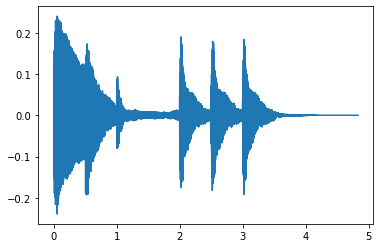

In [14]:
plt.plot(t_audio, audio)

In [10]:
win = 2048
audio = audio[0:2048]
N = len(audio)
# sample spacing
T = 1.0 / fs
x = np.linspace(0.0, N*T, N, endpoint=False)

yf = fft(audio)
yf = np.abs(yf[0:N//2])
yf /= max(yf)
xf = fftfreq(N, T)[:N//2]

699.8291015625

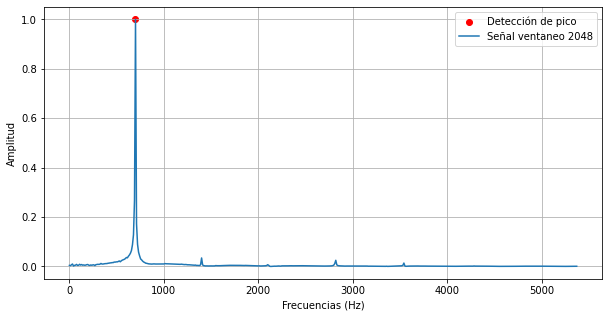

In [42]:
plt.scatter(int(xf[np.argmax(yf)]), 1, color='r', label='Detección de pico')
plt.plot(xf[:500], yf[:500], label='Señal ventaneo 2048')
plt.grid()
plt.legend()
plt.xlabel('Frecuencias (Hz)')
plt.ylabel('Amplitud')
xf[np.argmax(yf)]

In [45]:
np.round(6.2)

6.0

In [9]:
pretty_midi.hz_to_note_number(xf[np.argmax(yf)])

69.05619991710802

In [46]:
vec_pred = []
win = 2048
iters = len(audio)//win
for i in range(iters):
    seg = audio[i * win: i * win + win]
    N = len(seg)
    # sample spacing
    T = 1.0 / fs
    x = np.linspace(0.0, N*T, N, endpoint=False)

    yf = fft(seg)
    yf = np.abs(yf[0:N//2])
    yf /= max(yf)
    xf = fftfreq(N, T)[:N//2]
    
    max_freq = xf[np.argmax(yf)]
    midi = pretty_midi.hz_to_note_number(max_freq)
    print(midi)
    vec_pred.append(np.round(midi))


69.05619991710802
69.05619991710802
69.05619991710802
69.05619991710802
69.05619991710802
69.05619991710802
72.14209399107352
72.14209399107352
72.14209399107352
72.14209399107352
72.14209399107352
79.27901624923842
79.04347056825122
79.04347056825122
79.04347056825122
79.04347056825122
79.04347056825122
79.04347056825122
79.04347056825122
79.04347056825122
79.04347056825122
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
75.93442391244565
75.93442391244565
75.93442391244565
75.93442391244565
75.93442391244565
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248
77.03398961803248


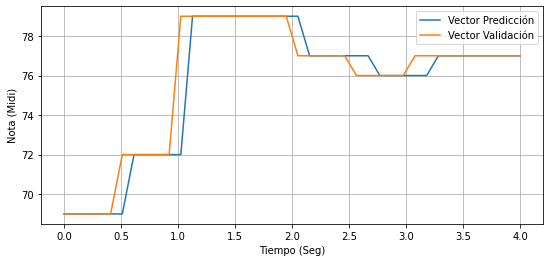

In [48]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 4]
plt.plot(t_prueba, vec_pred[:-12], label='Vector Predicción')
plt.plot(t_prueba, vec_validacion, label='Vector Validación')
plt.xlabel('Tiempo (Seg)')
plt.ylabel('Nota (Midi)')
plt.legend()
plt.grid()

In [51]:
sigma = []
vec_pred = vec_pred[:-12]
for i in range(len(vec_validacion)):
    if vec_validacion[i] == int(vec_pred[i]):
        sigma.append(1)
    else:
        sigma.append(0)
                    
s = np.array(sigma)
s = np.sum(s)/len(s)
s

0.825

In [6]:
def shift_armonic(S, R):
    R = R + 1  
    S_shift = np.zeros(len(S))
    
    for i in range(len(S)//2):
        S_shift[i] = (sum(S[R*i:R*i+R]))/2
        
    return S_shift
        
    

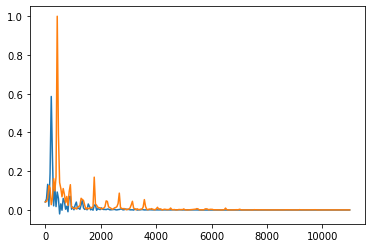

In [43]:
new_y = shift_armonic(yf, 2)
plt.plot(xf, decimate(np.hstack([yf, np.zeros(len(yf))]), 2))
plt.plot(xf, yf)

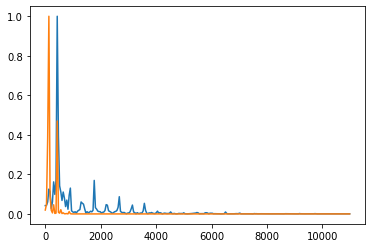

In [39]:
rta = np.copy(yf)

for i in range(2,4):
    new_y = shift_armonic(yf, i)
    rta *= new_y
    #plt.plot(xf, new_y)
    
plt.plot(xf, yf)
plt.plot(xf, rta/np.max(rta))

In [51]:
def HHT(signal, R):
    
    resample_length = len(signal) * R
    sig = resample(signal, resample_length)
    
    for i in range(2, R):
        i = R - i
        new_sig = np.hstack([signal, np.zeros(len(signal) * i - 1)])
        
        if len(new_sig) != len(sig):
            new_sig = resample(new_sig, resample_length)
        
        sig *= new_sig
    
    return resample(sig, len(signal))
        

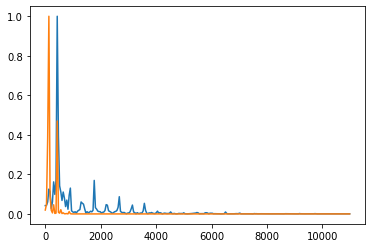

In [52]:
new_rta = HHT(yf, 5)

plt.plot(xf, yf)
plt.plot(xf, rta/np.max(rta))